In [3]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore


def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [4]:
parquet = "/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/conformer_test/charge_models_no_riniker_2.parquet"
df = pd.read_parquet(parquet)
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"[-0.44000147988059796, 0.33859736523892947, -0...","[-0.05586498245614034, -0.01726498245614034, -...","[-0.10983872936483015, 0.27650585247759235, -0...",None,"[-0.5583, 0.342, -0.5662, 0.1224, 0.0993, -0.4...",3.654122,3.767507,4.061059,2.652702,NaN,...,"[0.09220103840683276, 0.09275196970520054, 0.0...",NaN,NaN,"[0.0934209650979767, 0.0938590895494702, 0.091...",[C:1]([C:2]1=[C:3]([H:32])[c:4]2[c:5]([c:7]([H...,"[[-7.778174592959183, -2.4748737339672395, -1....","[4.876269232336068, 3.997392225685083, 0.79979...",1,[H][C]1=[C]([C]([H])([H])[H])[N]([H])[c]2[c]([...,-1221.404013
351,"[-0.4383900310382283, 0.33852306771309265, -0....","[-0.04988252631578947, -0.043282526315789466, ...","[-0.109838729364

In [4]:
df.columns

Index(['mbis_charges', 'am1bcc_charges', 'espaloma_charges',
       'riniker_monopoles', 'resp_charges', 'qm_dipoles', 'mbis_dipoles',
       'am1bcc_dipole', 'espaloma_dipole', 'riniker_dipoles', 'resp_dipole',
       'am1bcc_esp_rms', 'am1bcc_esp', 'espaloma_esp_rms', 'espaloma_esp',
       'resp_esp_rms', 'resp_esp', 'mbis_esp_rms', 'mbis_esp',
       'riniker_esp_rms', 'riniker_esp', 'qm_esp', 'molecule', 'grid',
       'geometry', 'conformer_no', 'smiles', 'energy'],
      dtype='object')

In [9]:
df.iloc[1]['conformer_no']

3

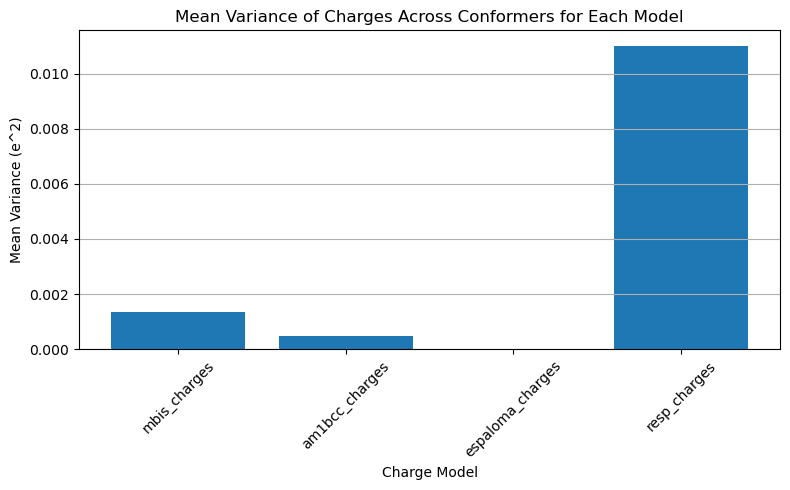

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by smiles
grouped = df.groupby("smiles")

# Charge models to analyze
charge_models = ["mbis_charges", "am1bcc_charges", "espaloma_charges", "resp_charges"]

# Calculate variance of charges
charge_variances = {model: [] for model in charge_models}

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())
        # Compute variance for each atom index
        variances = np.var(charges, axis=0)
        # Store the mean variance across all atom indices for this smiles
        charge_variances[model].append(np.mean(variances))

# Aggregate variance data
aggregated_variances = {model: np.mean(variances) for model, variances in charge_variances.items()}

# Plot variance across charge models
plt.figure(figsize=(8, 5))
plt.bar(aggregated_variances.keys(), aggregated_variances.values())
plt.title("Mean Variance of Charges Across Conformers for Each Model")
plt.xlabel("Charge Model")
plt.ylabel("Mean Variance (e^2)")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


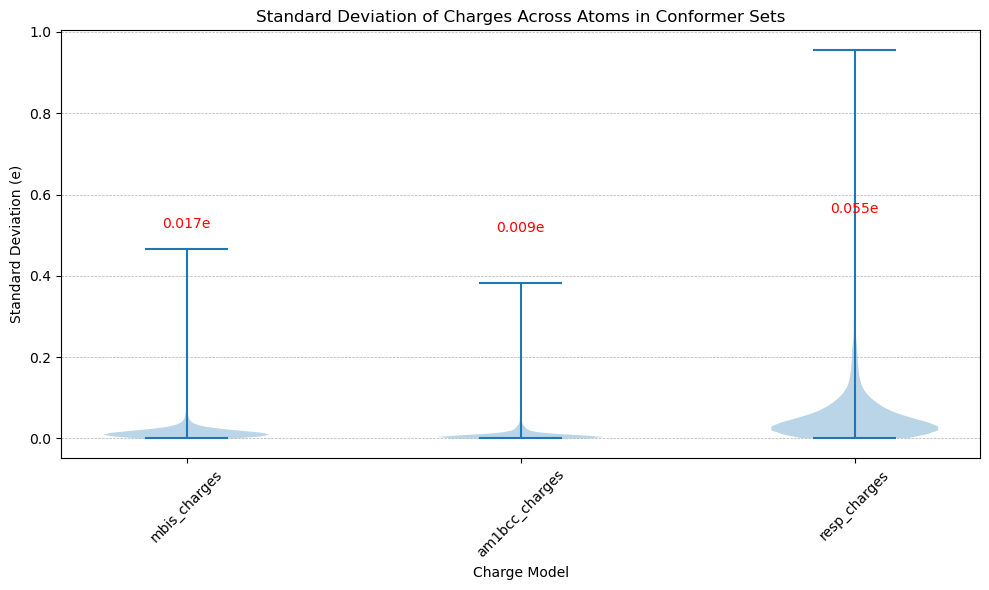

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by smiles
grouped = df.groupby("smiles")

# Charge models to analyze
charge_models = ["mbis_charges", "am1bcc_charges", "resp_charges"]

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}
mean_std_deviation = {}  # To store mean standard deviations for annotation

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the violin plot
        std_deviation_data[model].extend(std_deviation)

# Calculate mean standard deviation for each charge model
mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in charge_models}

# Prepare data for the violin plot
violin_data = [std_deviation_data[model] for model in charge_models]

# Plotting the violin plot
plt.figure(figsize=(10, 6))
parts = plt.violinplot(violin_data, showmeans=False)

# Add mean standard deviation values above each violin
for i, model in enumerate(charge_models, start=1):
    mean_value = mean_std_deviation[model]
    plt.text(i, mean_value + 0.50, f"{mean_value:.3f}e", ha="center", color="red", fontsize=10)

# Add labels and grid
plt.xticks(range(1, len(charge_models) + 1), charge_models, rotation=45)
plt.title("Standard Deviation of Charges Across Atoms in Conformer Sets")
plt.xlabel("Charge Model")
plt.ylabel("Standard Deviation (e)")
plt.grid(axis="y", linestyle='--', linewidth=0.5)  # Remove vertical grid lines
plt.tight_layout()
plt.show()


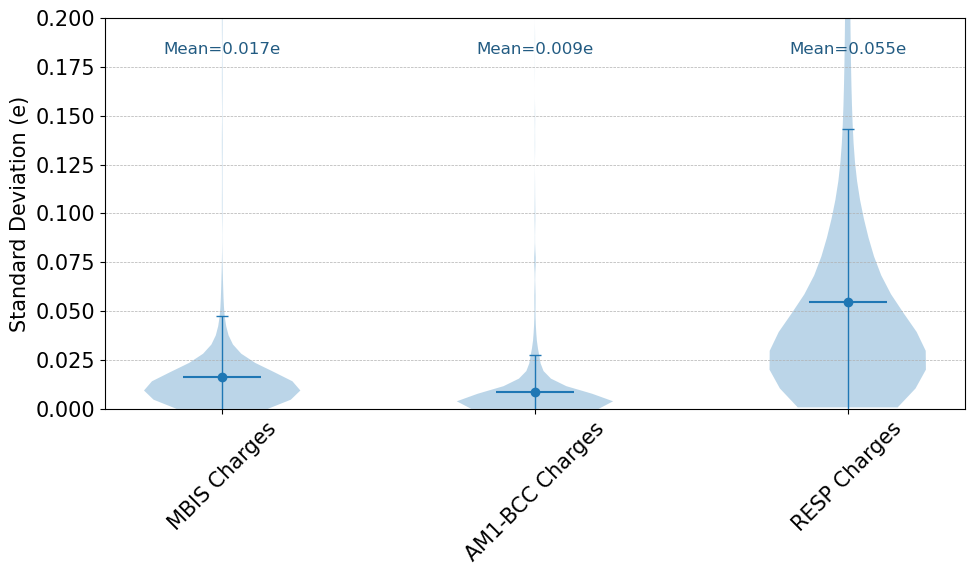

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 15          # Base font size
mpl.rcParams['axes.labelsize'] = 15     # Axis label font size
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] =15
mpl.rcParams['ytick.labelsize'] = 15

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the box plot
        std_deviation_data[model].extend(std_deviation)

plt.figure(figsize=(10, 6))

# Draw the violin plot with means displayed
parts = plt.violinplot(
    violin_data,
    showmeans=True,  # show the green mean lines inside violins
    showextrema=False,
    showmedians=False
)


# Mark means and std deviations with error bars
for i, model in enumerate(charge_models, start=1):
    mean_val = mean_std_deviation[model]
    std_val = np.array(std_deviation_data[model]).std()
    
    # Use errorbar to create vertical lines with top/bottom caps (±1 std)
    plt.errorbar(
        i,                  # x-position
        mean_val,           # y-position (the mean)
        yerr=std_val,       # the error margin for top/bottom
        fmt='o',            # marker style
        color="#1f77b4",    # color for the marker
        ecolor="#1f77b4",   # color for the error bars
        elinewidth=1,       # thickness of the error bar lines
        capsize=4,          # length of the top/bottom caps
        capthick=1,         # thickness of the cap lines
        zorder=3
    )
    
    # Optionally add text to label the mean above the error bar
    plt.text(
        i,
        0.18,          # small offset above the mean point
        f"Mean={mean_val:.3f}e",
        ha="center",
        va="bottom",
        color="#225b82",           # text color
        fontsize=12,
        zorder=4
    )

# Optionally limit the y-axis for better visibility
plt.ylim(0, 0.20)

# Add labels and grid
plt.xticks(range(1, len(charge_models) + 1),labels=['MBIS Charges','AM1-BCC Charges','RESP Charges'], rotation=45)
plt.ylabel("Standard Deviation (e)")
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.savefig("ConformerVoilinTest.png",dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()


/scratch/ipykernel_19688/2464158603.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=charge_labels, showfliers=False)  # Exclude outliers


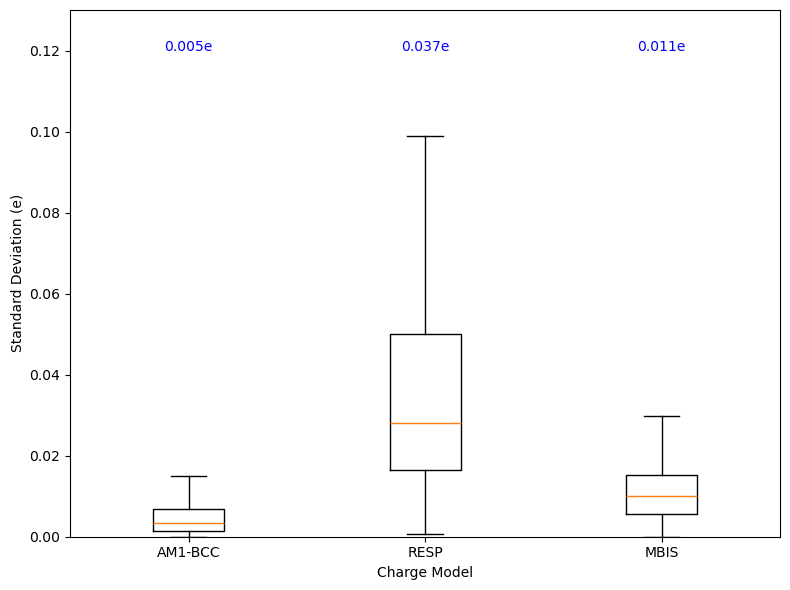

Outliers for Am1Bcc Charges:
[0.02127436266834908, 0.027303437029266315, 0.13384888309935364, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.11215947800763182, 0.02127436266834908, 0.027303437029266315, 0.13384888309935364, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.022106319012395032, 0.059458316690023334, 0.07563188513194101, 0.07563188513194101, 0.052022016239387646, 0.07644566811540804, 0.07644566811540804, 0.02831078575874887, 0.02831078575874887, 0.04555370647500717, 0.02831078575874887, 0.02831078575874887, 0.04555370647500717, 0.02662686301490771, 0.04215013016472844, 0.04215013016472844, 0.02662686301490771, 0.024157408005579938, 0.055716537876384205, 0.025708742152875875, 0.025708742152875875, 0.024157408005579938, 0.055716537876384205, 0.025708742152875875, 0.025708742152875875, 0.024157408005579938, 0.055

In [ ]:
# Group data by smiles
grouped = df.groupby("smiles")

# Updated charge models to analyze (in the desired order)
charge_models = ["am1bcc_charges", "resp_charges", "mbis_charges", ""]

# Labels for the x-axis
charge_labels = ["AM1-BCC", "RESP", "MBIS"]

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}
outliers = {model: [] for model in charge_models}  # To store outliers separately

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the box plot
        std_deviation_data[model].extend(std_deviation)

# Identify outliers using the IQR rule
for model, data in std_deviation_data.items():
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Separate outliers
    outliers[model] = [x for x in data if x < lower_bound or x > upper_bound]
    # Remove outliers from the main dataset
    std_deviation_data[model] = [x for x in data if lower_bound <= x <= upper_bound]

# Prepare data for the box plot
box_data = [std_deviation_data[model] for model in charge_models]

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(box_data, labels=charge_labels, showfliers=False)  # Exclude outliers
plt.ylim(0, 0.13)  # Set fixed y-axis range

# Annotate mean values for each charge model
mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in charge_models}
for i, model in enumerate(charge_models, start=1):
    mean_value = mean_std_deviation[model]
    plt.text(i, 0.12, f"{mean_value:.3f}e", ha="center", color="blue", fontsize=10)

# Add labels and grid
# plt.title("Standard Deviation of Charges Across Atoms in Conformer Sets")
plt.xlabel("Charge Model")
plt.ylabel("Standard Deviation (e)")
# plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('conformer_charge_transfer.png')
# Show the box plot
plt.show()

# Print outliers separately
for model, outlier_values in outliers.items():
    print(f"Outliers for {model.replace('_', ' ').title()}:")
    print(outlier_values)
    print("---------")

In [6]:
charge_models = ["am1bcc_esp", "resp_esp", "mbis_esp"]

compare_with = "qm_esp"




{'mbis_charges': [0.0006994935660714942,
  0.005871808830641483,
  0.008782684495693915,
  0.008947518478558042,
  0.005827503700104636,
  0.01749290079114495,
  0.019504909028747536,
  0.00712819330242818,
  0.005235379687791834,
  0.010499578360525745,
  0.007187452851954866,
  0.003596747155189182,
  0.008809907805309429,
  0.0027575961420574276,
  0.002606043264043893,
  0.0008635588343833915,
  0.0006911536371826267,
  0.001986796120259516,
  0.0005980025965195742,
  0.0017632791840824725,
  0.0016500317723918746,
  0.0007314176424576932,
  0.0004552659933717988,
  0.0002742916678580283,
  0.00016053285455752526,
  0.001431355207937409,
  0.0059985590454115795,
  0.010351382596372014,
  0.009351358740258945,
  0.007060136093337669,
  0.006982872136019148,
  0.003444501321857407,
  0.014684387192362184,
  0.009801445801820895,
  0.022561205159397326,
  0.0005493692100163734,
  0.004694480137433772,
  0.006165742672141327,
  0.002505726355163484,
  0.008571005190993195,
  0.01177716

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


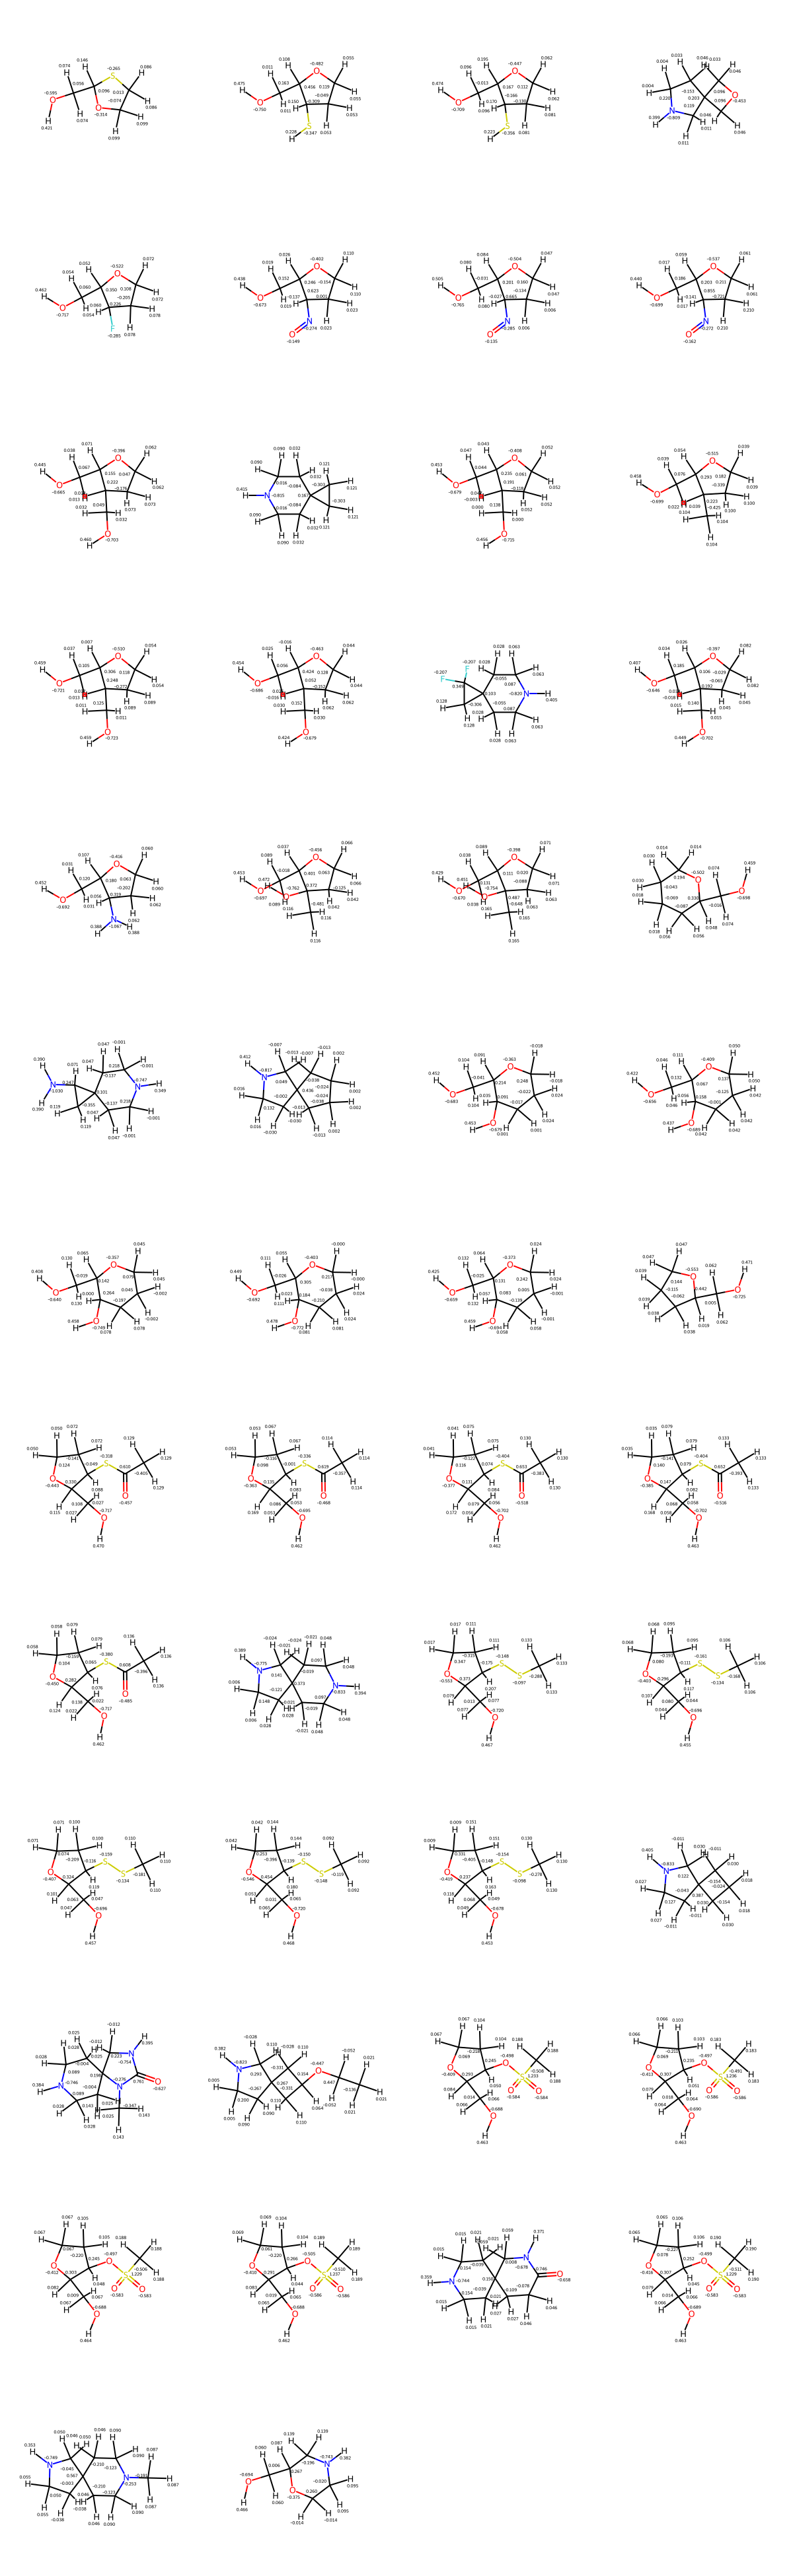

In [31]:
draw_mols  = list(range(1,80))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=4, subImgSize=(300, 300))
img

/scratch/ipykernel_13008/2251617336.py:1: AtomMappingWarning: Warning! Fully mapped SMILES pattern passed to `from_smiles`. The atom map is stored as a property in `Molecule._properties`, but these indices are NOT used to determine atom ordering. To use these indices for atom ordering, use `Molecule.from_mapped_smiles`.
  openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)


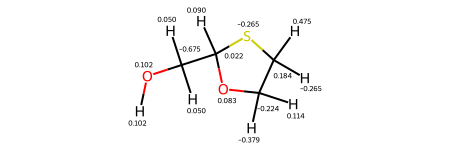

In [17]:


openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)
rdkit_mol = openff_molecule.to_rdkit()
resp_charges =  df.iloc[0]['resp_charges']
for i, atom in enumerate(rdkit_mol.GetAtoms()):
    lbl = '%.3f' % (resp_charges[i])
    atom.SetProp('atomNote', lbl)
rdkit_mol